# $\Phi$-SO demo (quick SR)

In [1]:
# External packages
import numpy as np
# Internal code import
import physo

### Dataset

In [2]:
# Dataset
z = np.random.uniform(-10, 10, 50)
v = np.random.uniform(-10, 10, 50)
X = np.stack((z, v), axis=0)
y = 1.234*9.807*z + 1.234*v**2

### Running SR task

SR task started...
=========== Epoch 00000 ===========
-> Time 7.11 s

Overall best  at R=0.524964
-> Raw expression : 
                        2
  ⎛     ⎛   m⋅v       ⎞⎞ 
  ⎜     ⎜   ────      ⎟⎟ 
  ⎜     ⎜   -m⋅v      ⎟⎟ 
  ⎜     ⎜  ℯ          ⎟⎟ 
m⋅⎜v⋅sin⎜- ───── - 1.0⎟⎟ 
  ⎝     ⎝   1.0       ⎠⎠ 

Best of epoch at R=0.524964
-> Raw expression : 
                        2
  ⎛     ⎛   m⋅v       ⎞⎞ 
  ⎜     ⎜   ────      ⎟⎟ 
  ⎜     ⎜   -m⋅v      ⎟⎟ 
  ⎜     ⎜  ℯ          ⎟⎟ 
m⋅⎜v⋅sin⎜- ───── - 1.0⎟⎟ 
  ⎝     ⎝   1.0       ⎠⎠ 


=========== Epoch 00001 ===========
-> Time 4.88 s

Overall best  at R=0.597741
-> Raw expression : 
    ⎛  ⎛     ⎛   0.5⎛v⎞⎞           ⎞    ⎞
g⋅m⋅⎜z⋅⎜- log⎜sin   ⎜─⎟⎟ + sin(1.0)⎟ + z⎟
    ⎝  ⎝     ⎝      ⎝v⎠⎠           ⎠    ⎠

Best of epoch at R=0.597741
-> Raw expression : 
    ⎛  ⎛     ⎛   0.5⎛v⎞⎞           ⎞    ⎞
g⋅m⋅⎜z⋅⎜- log⎜sin   ⎜─⎟⎟ + sin(1.0)⎟ + z⎟
    ⎝  ⎝     ⎝      ⎝v⎠⎠           ⎠    ⎠


=========== Epoch 00002 ===========
-> Time 3.27 s

Overall

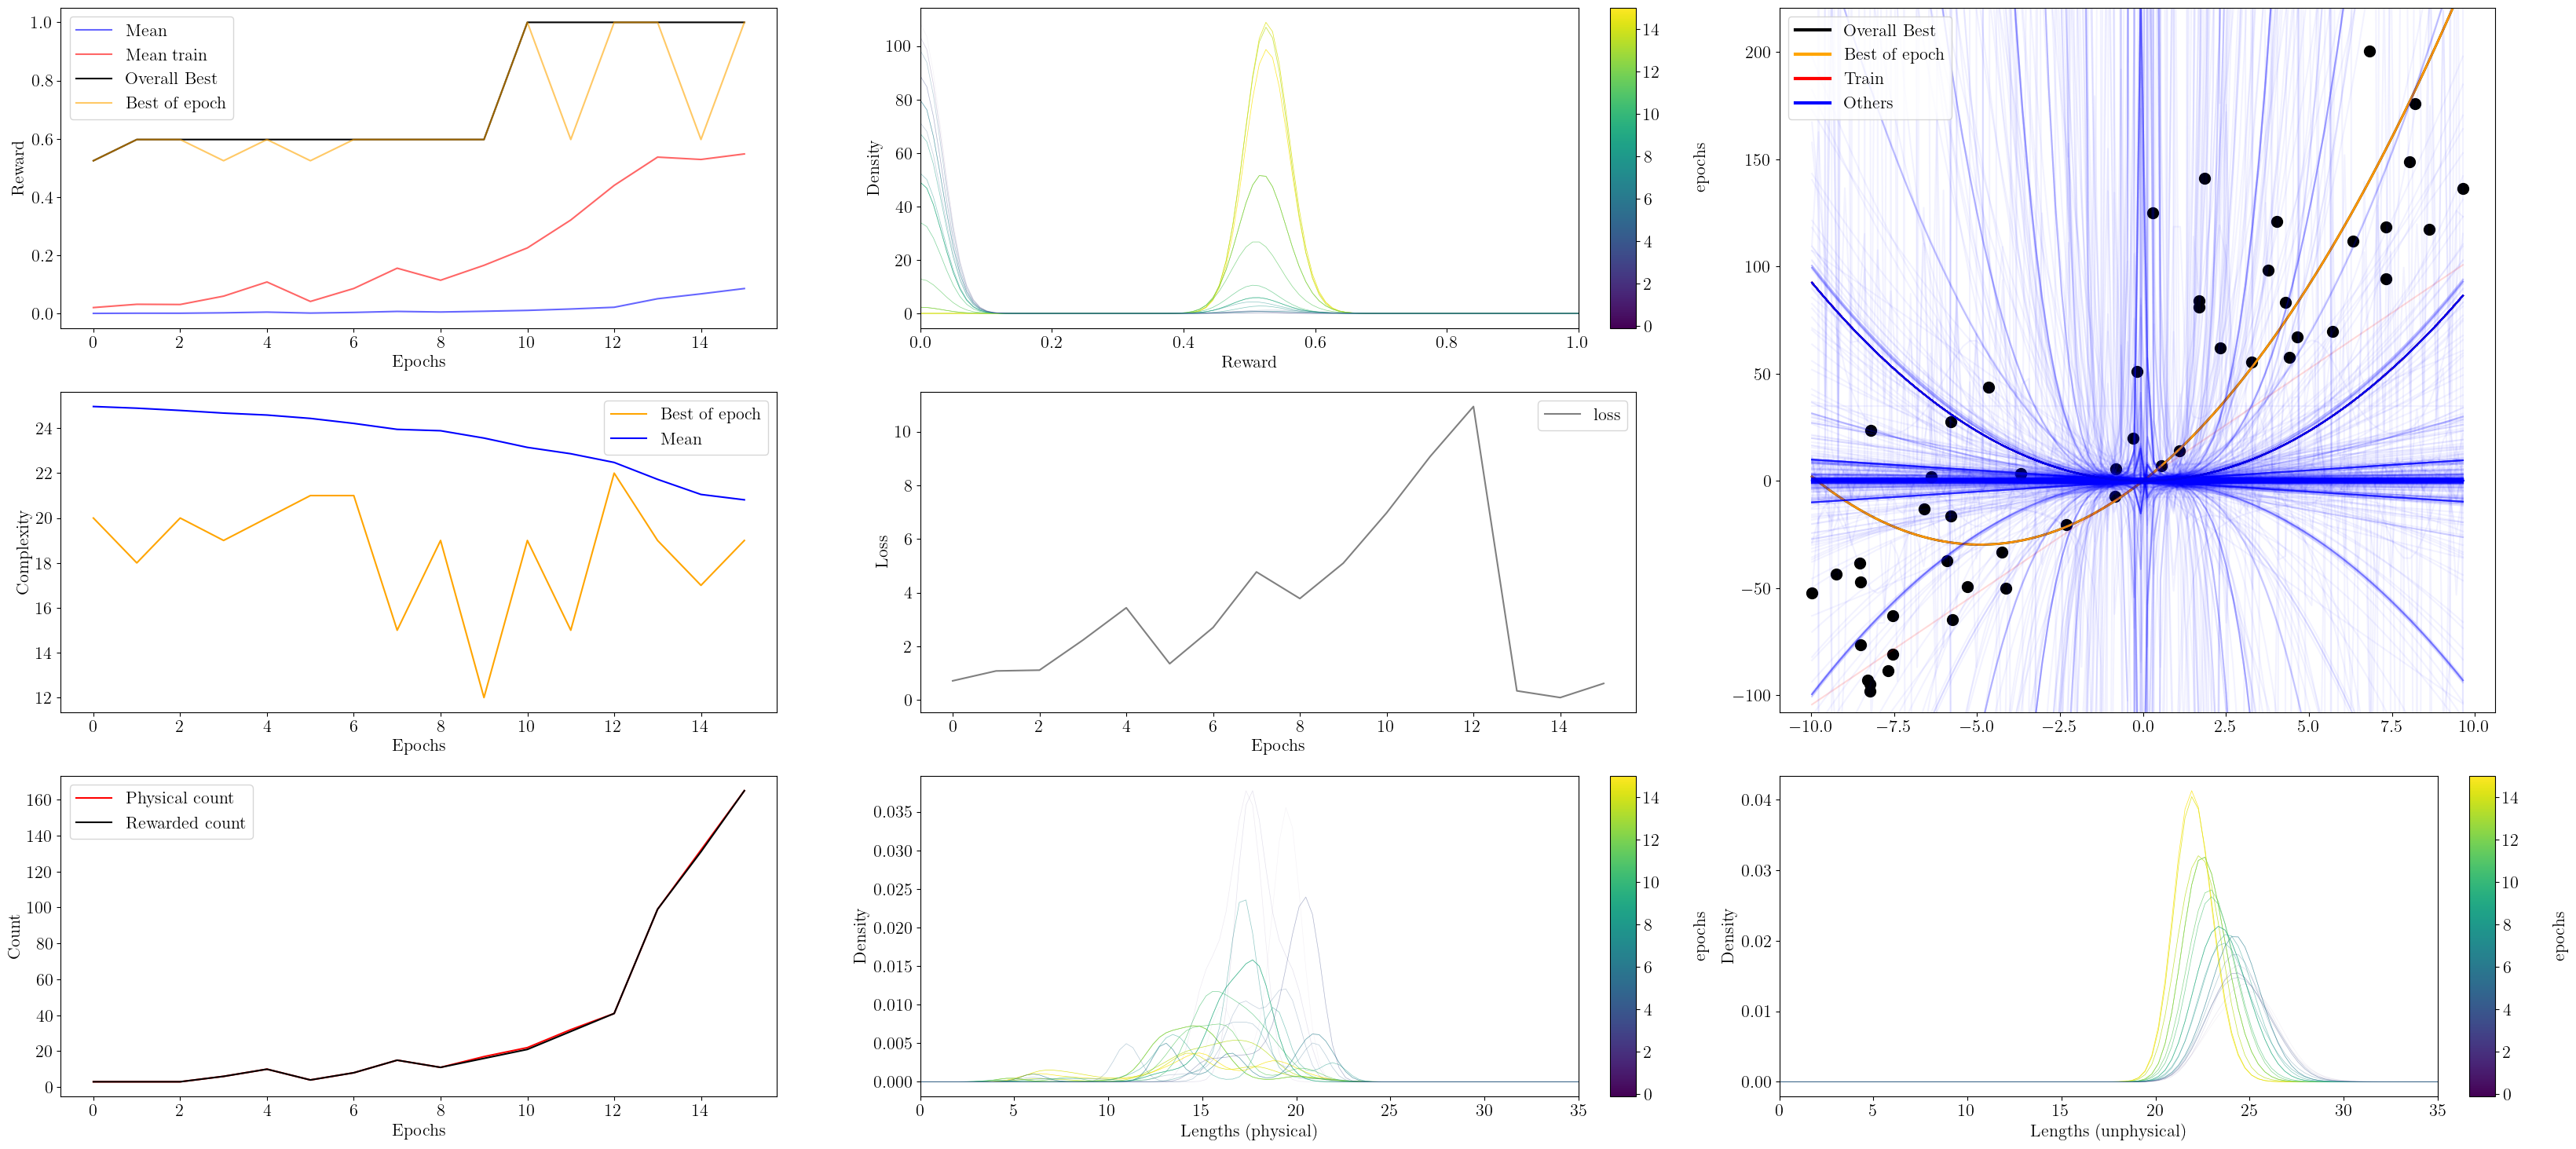

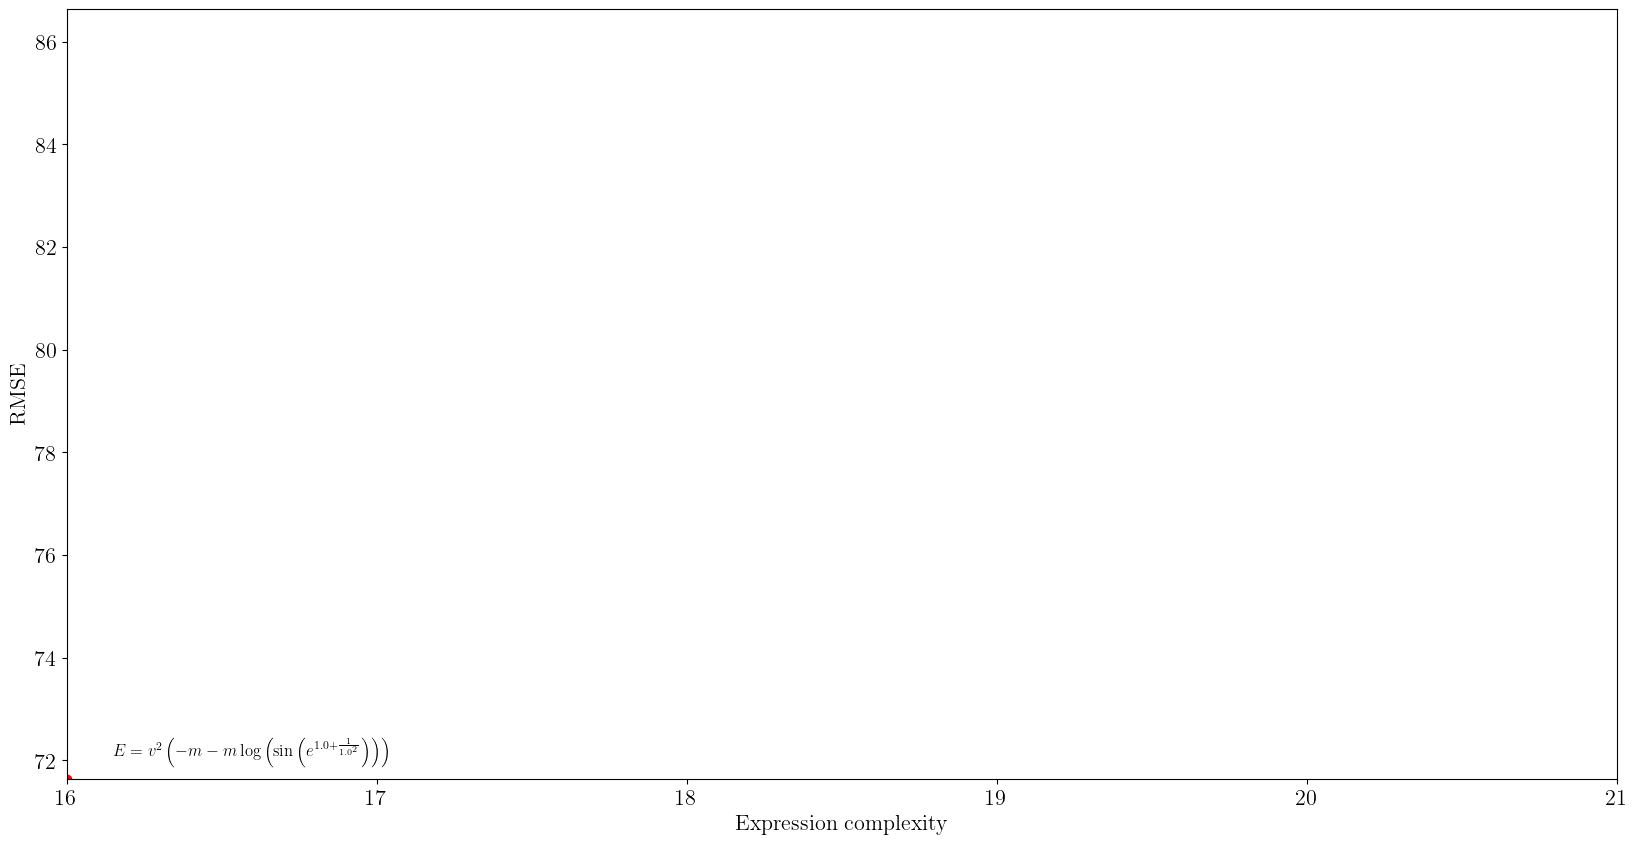

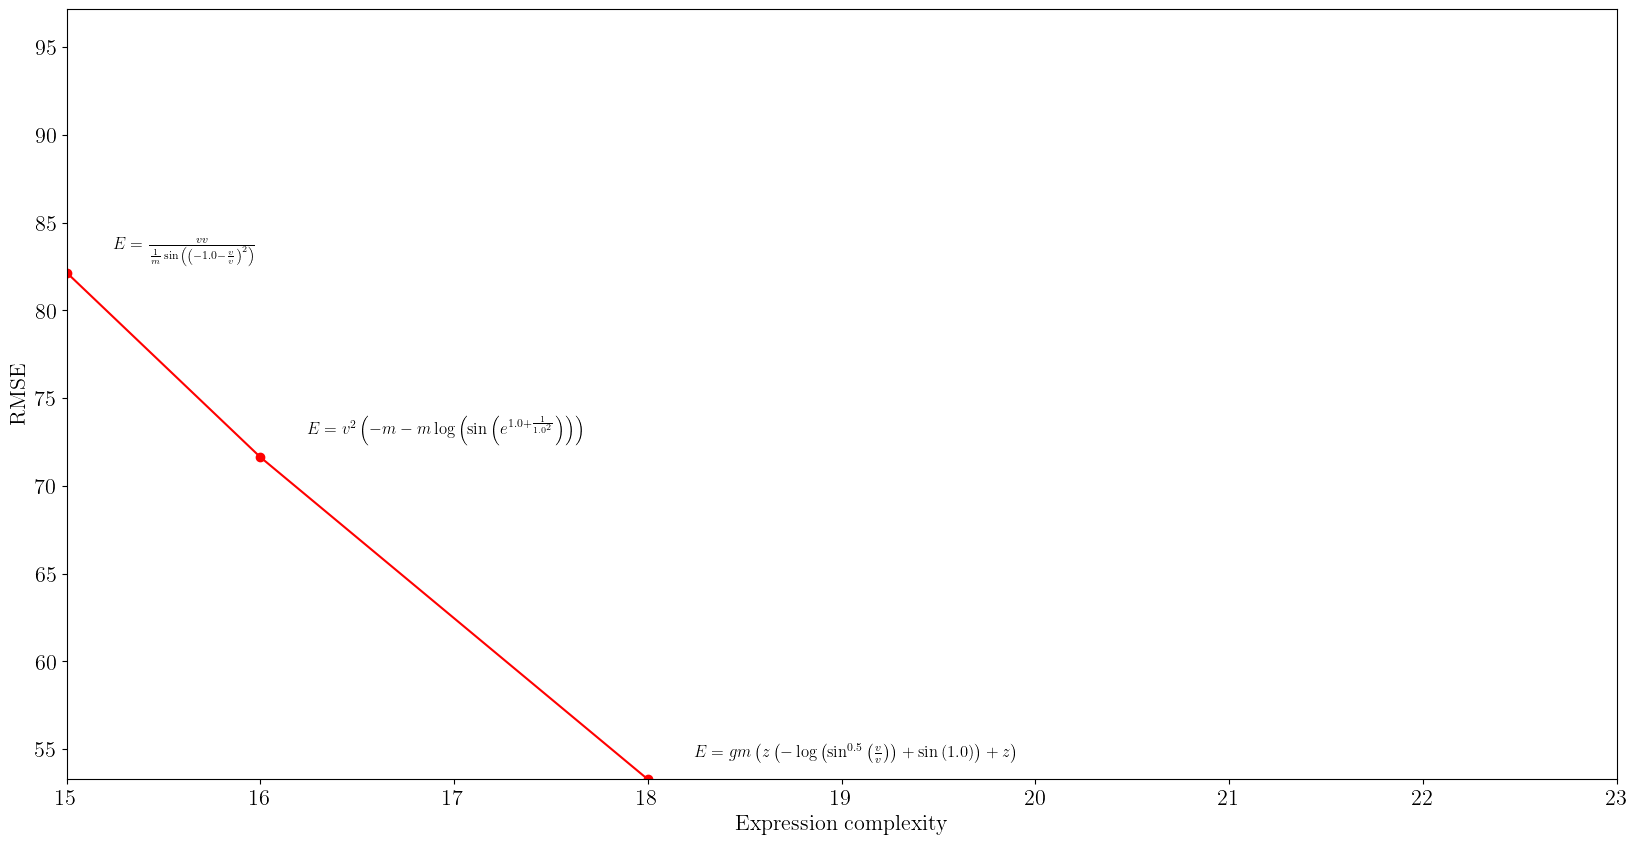

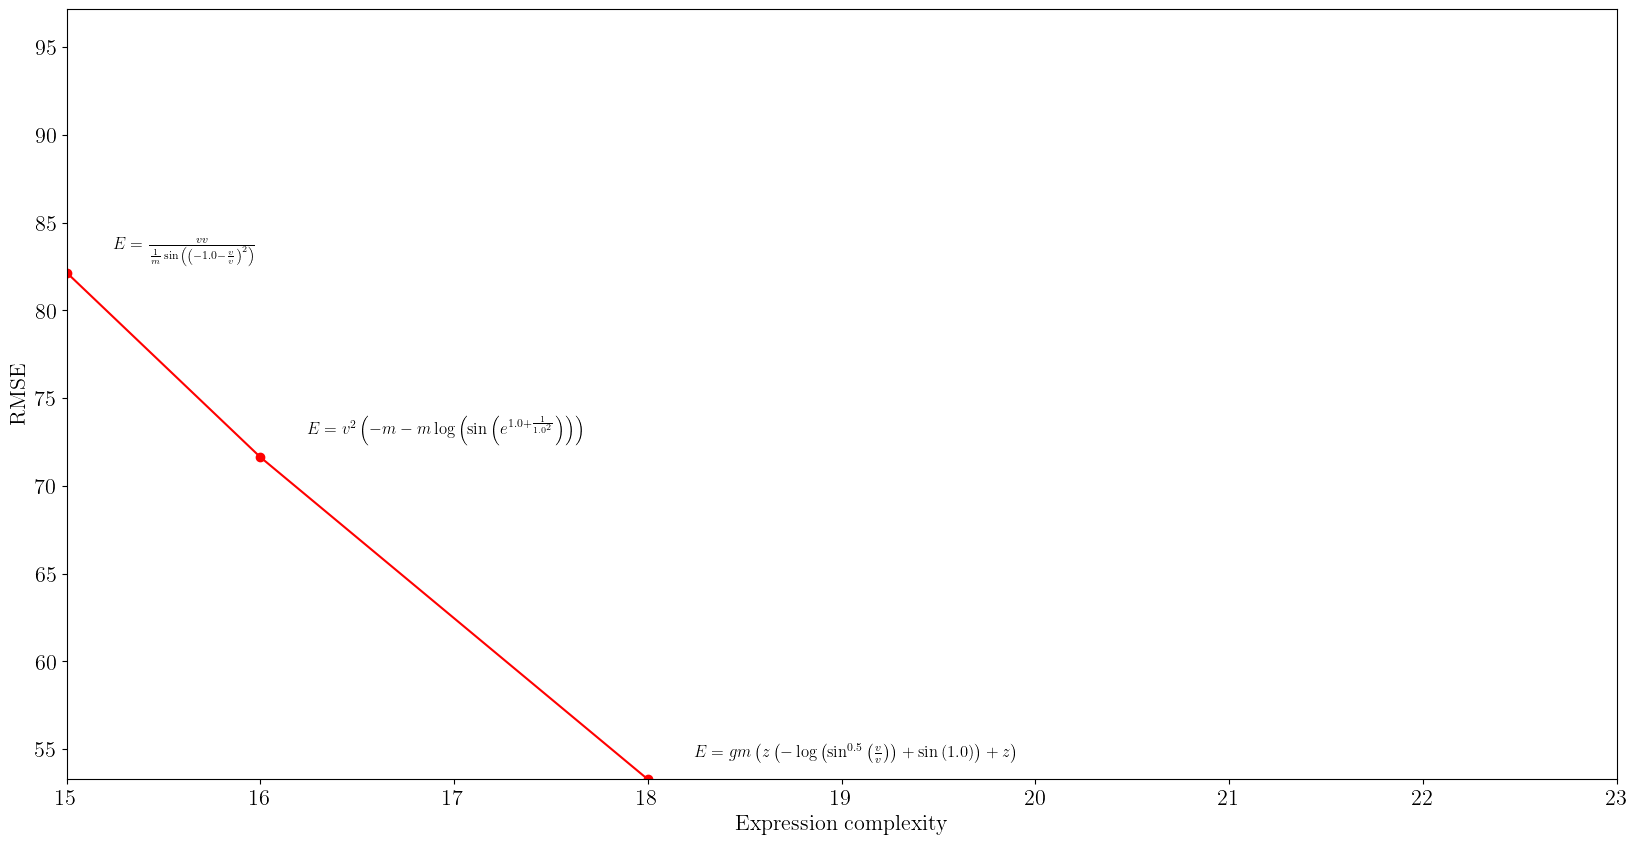

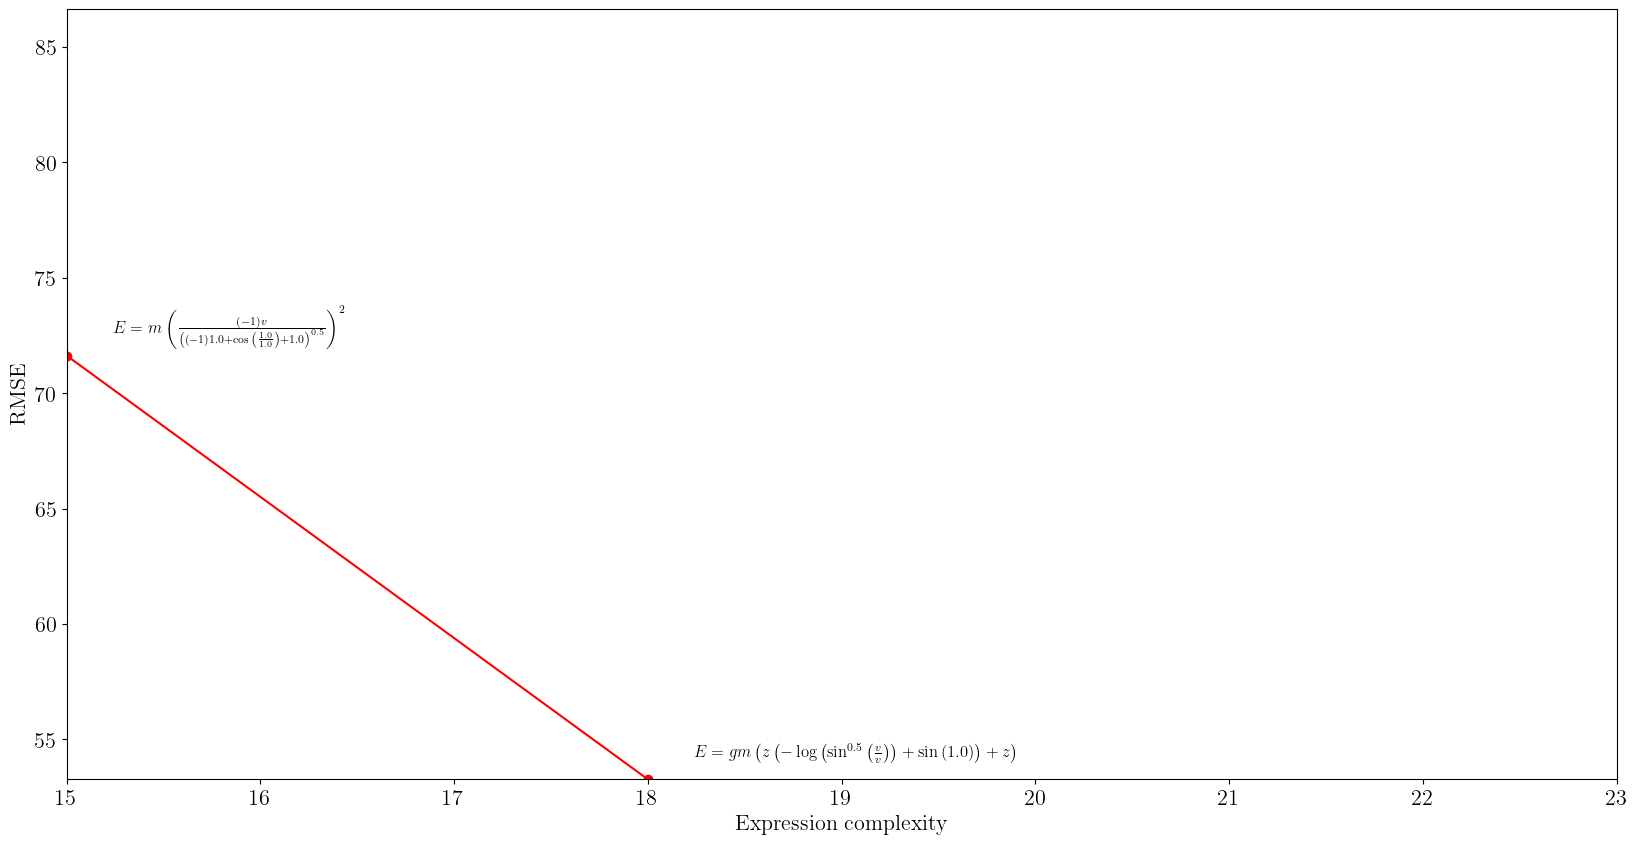

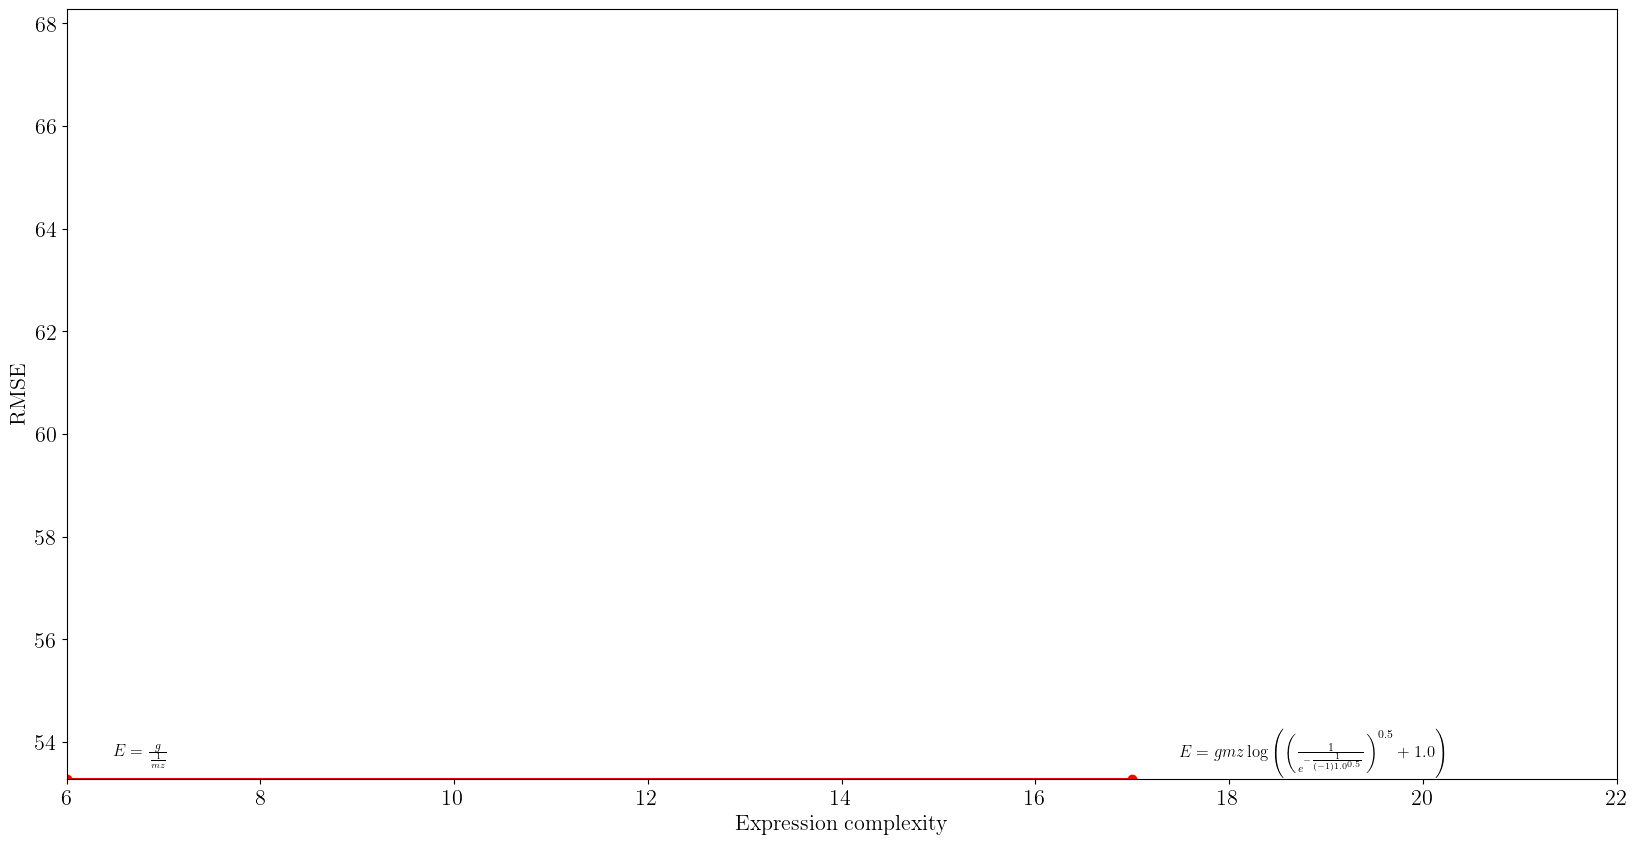

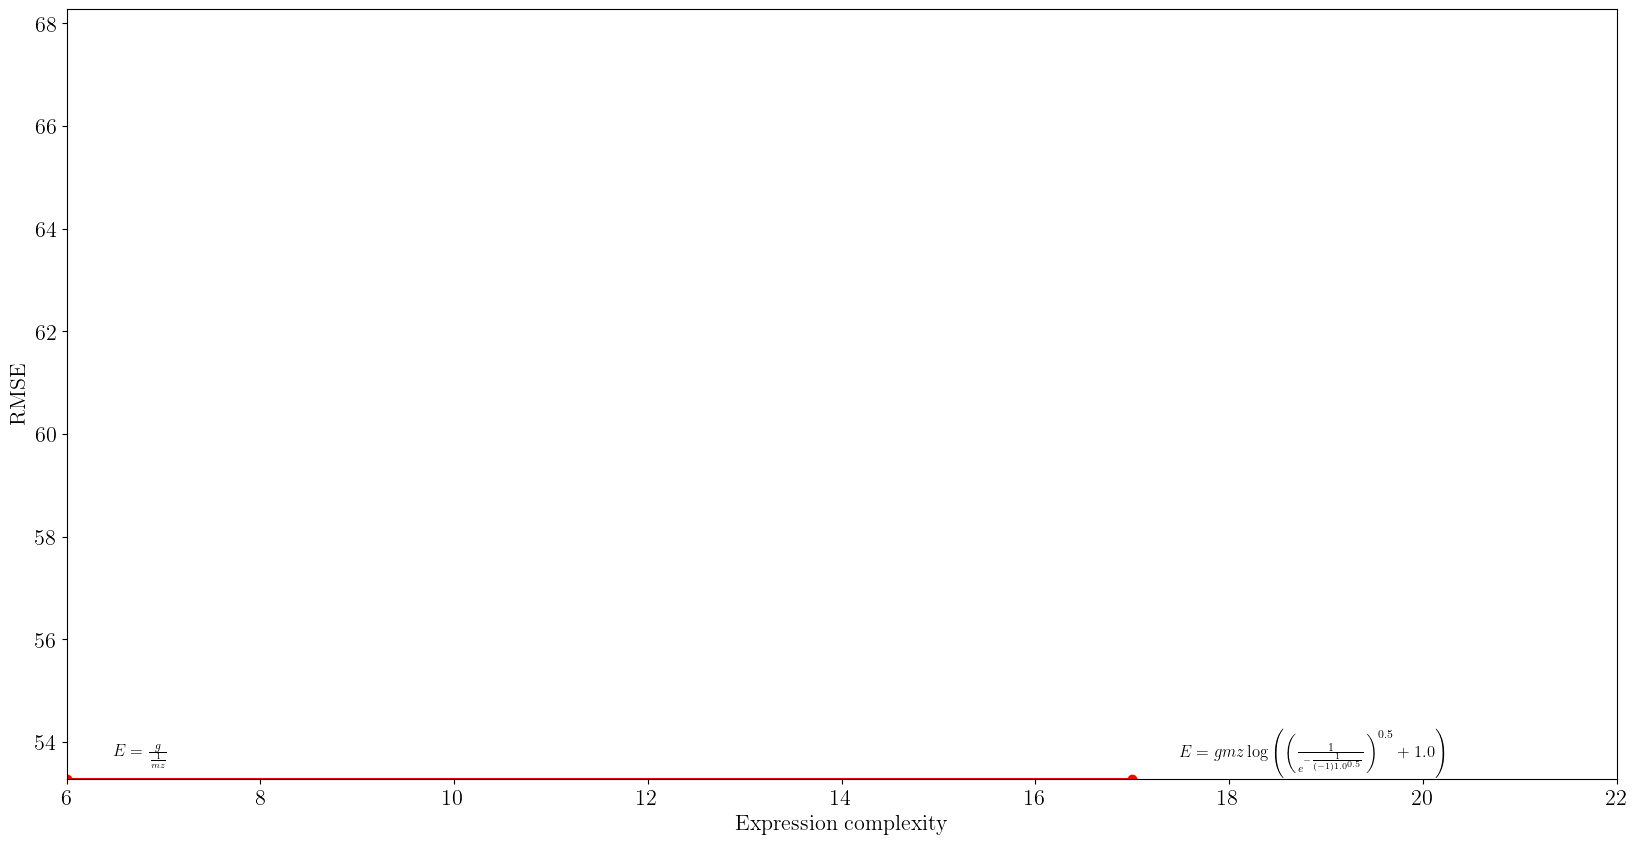

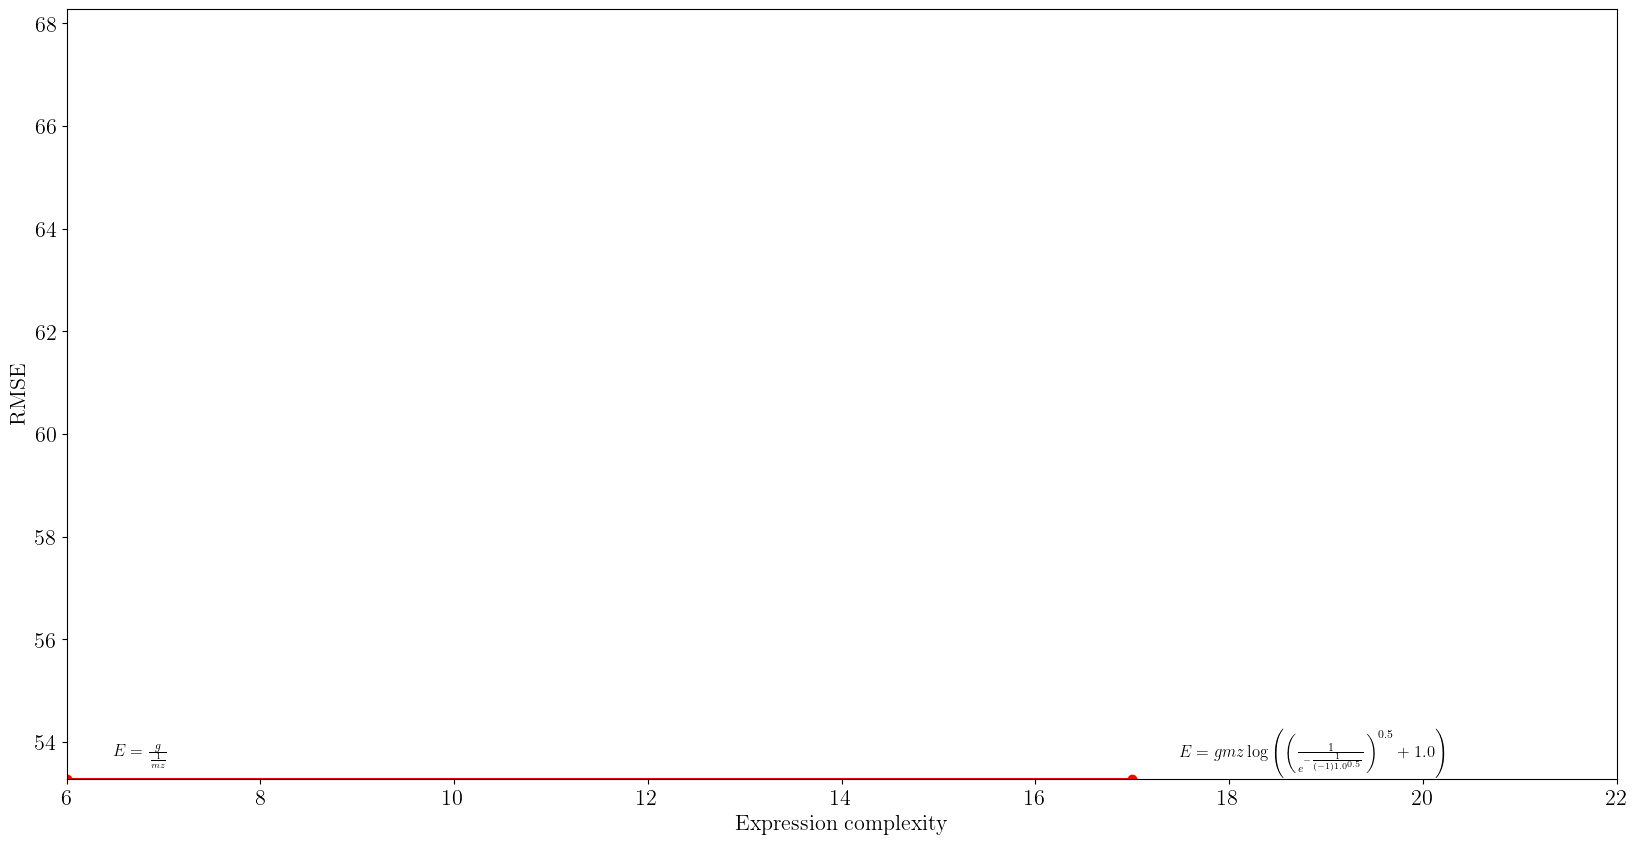

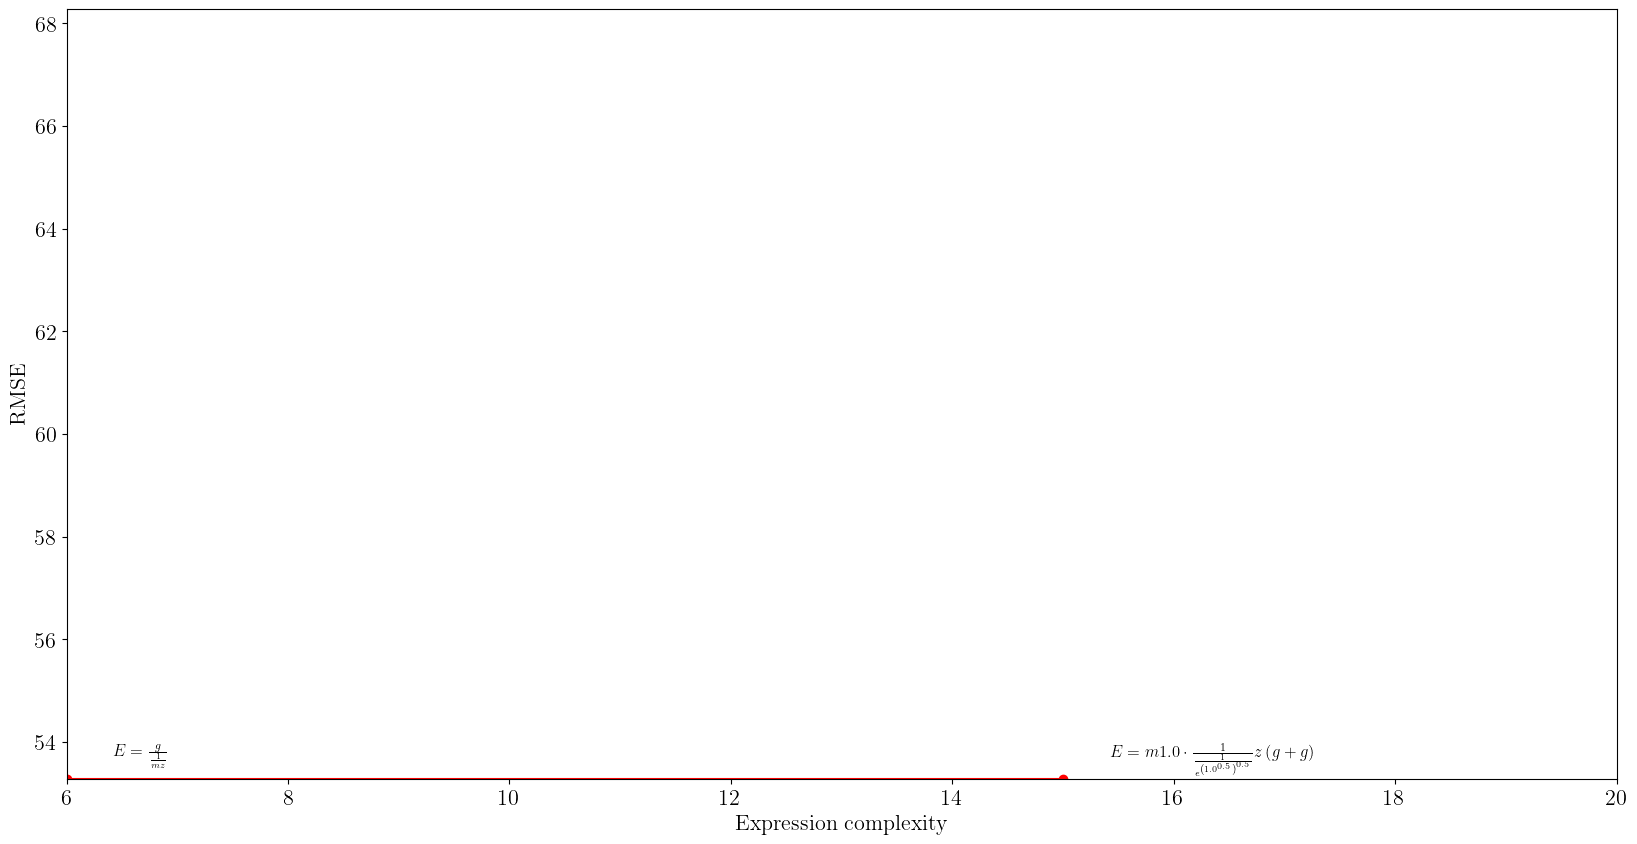

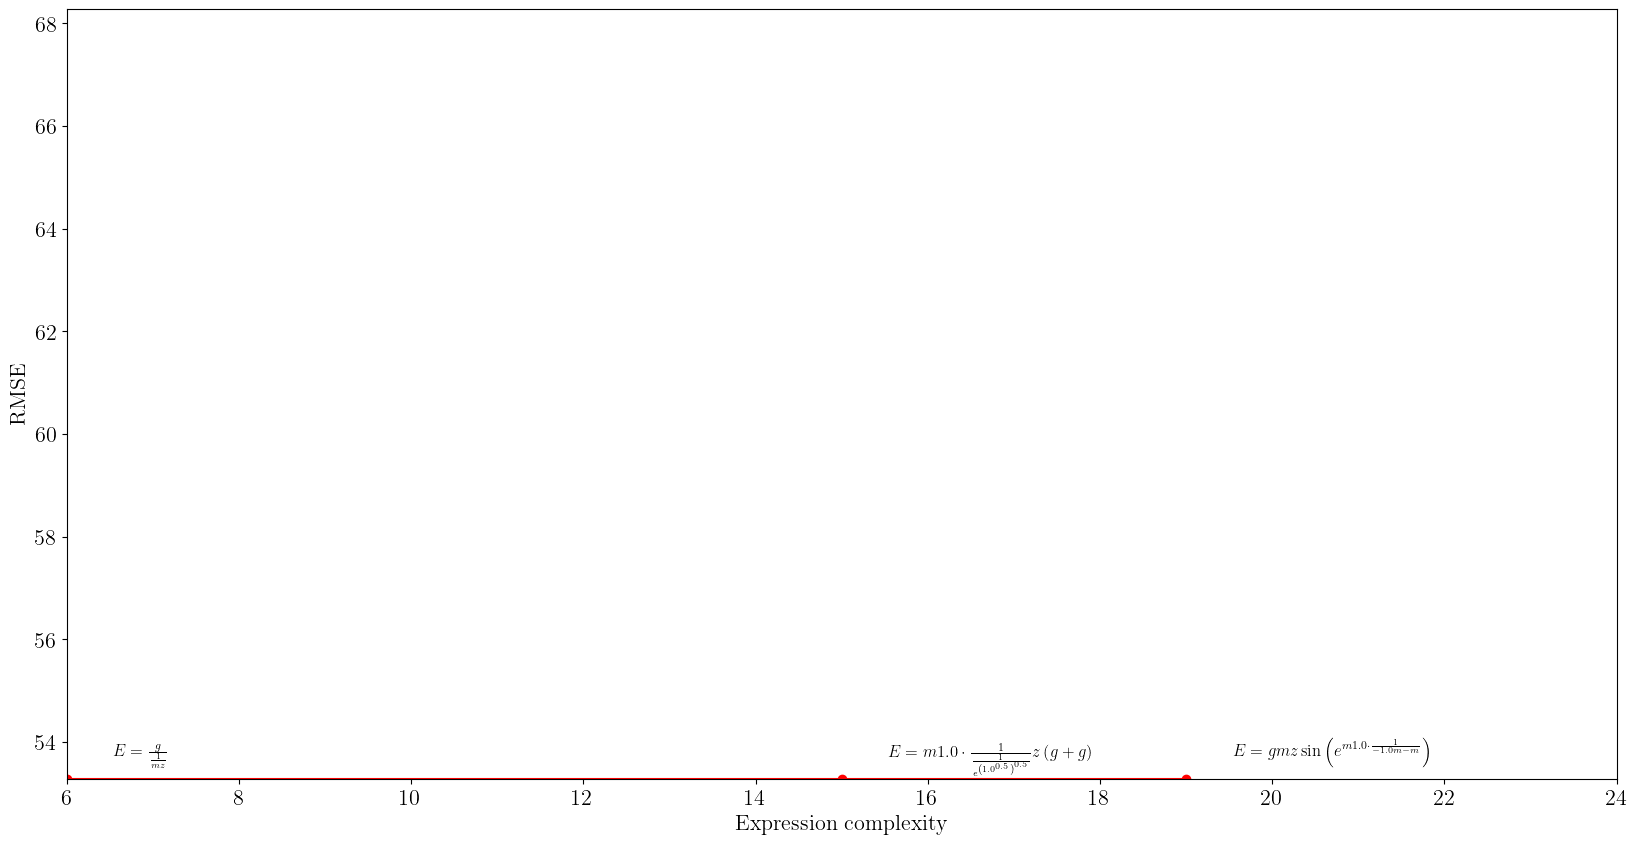

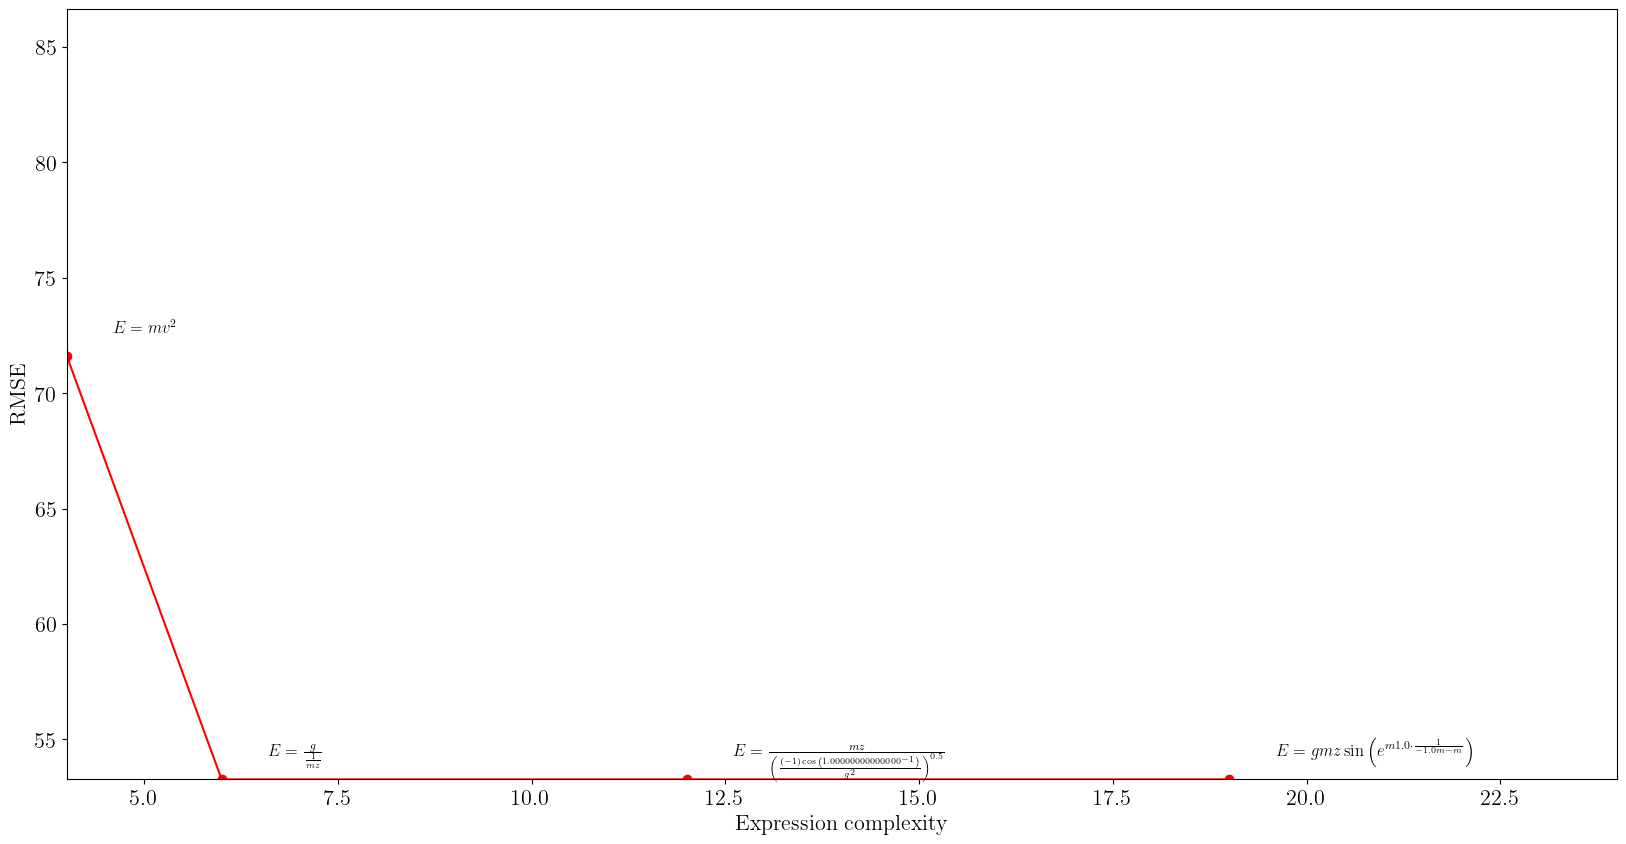

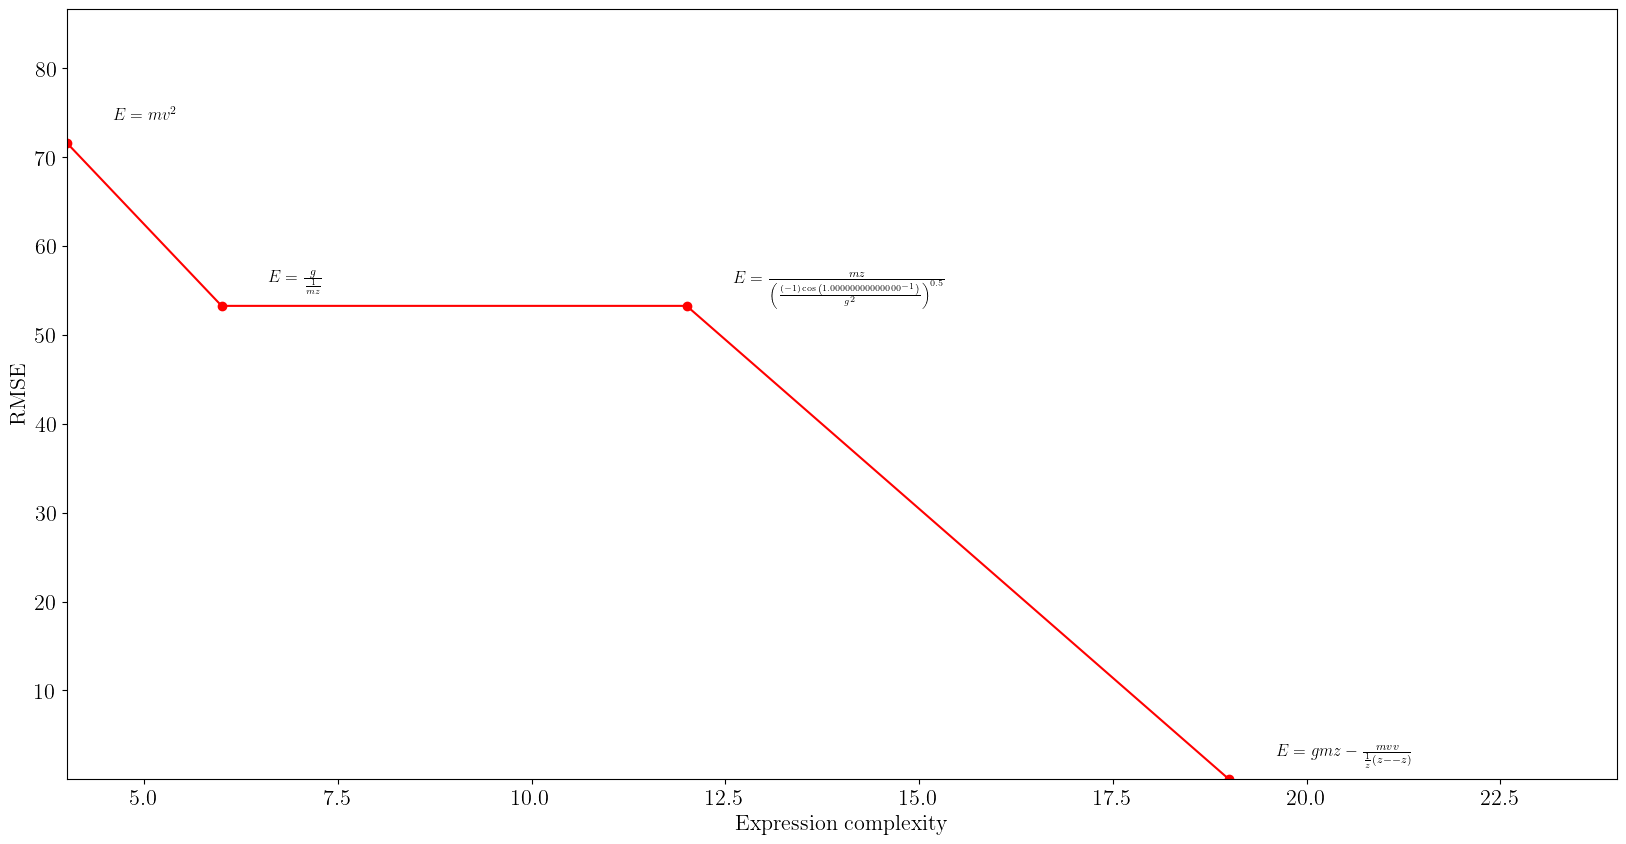

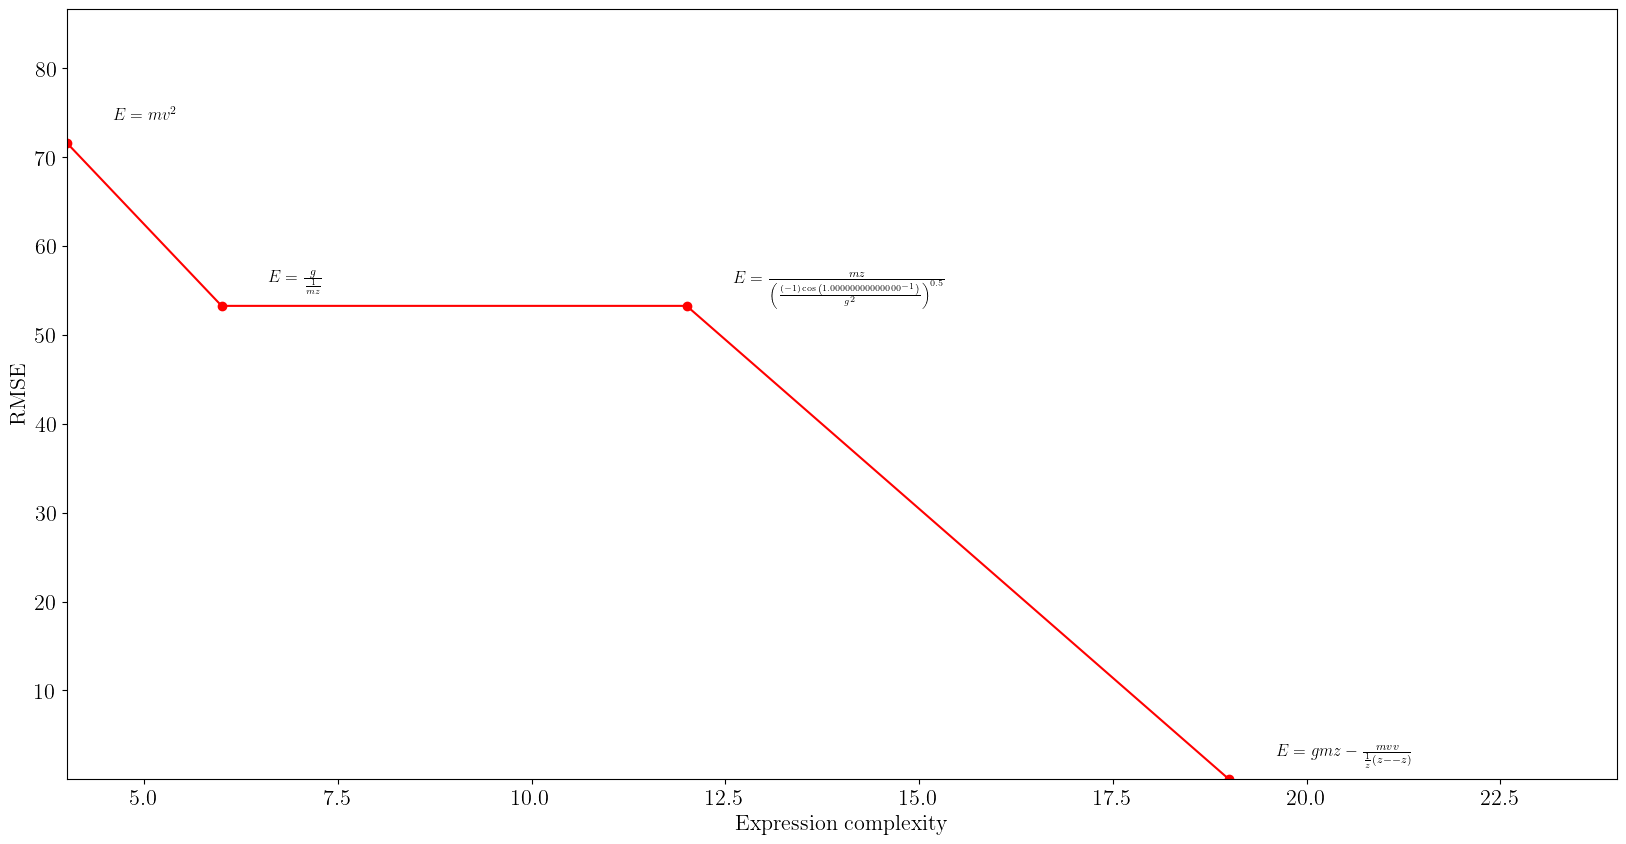

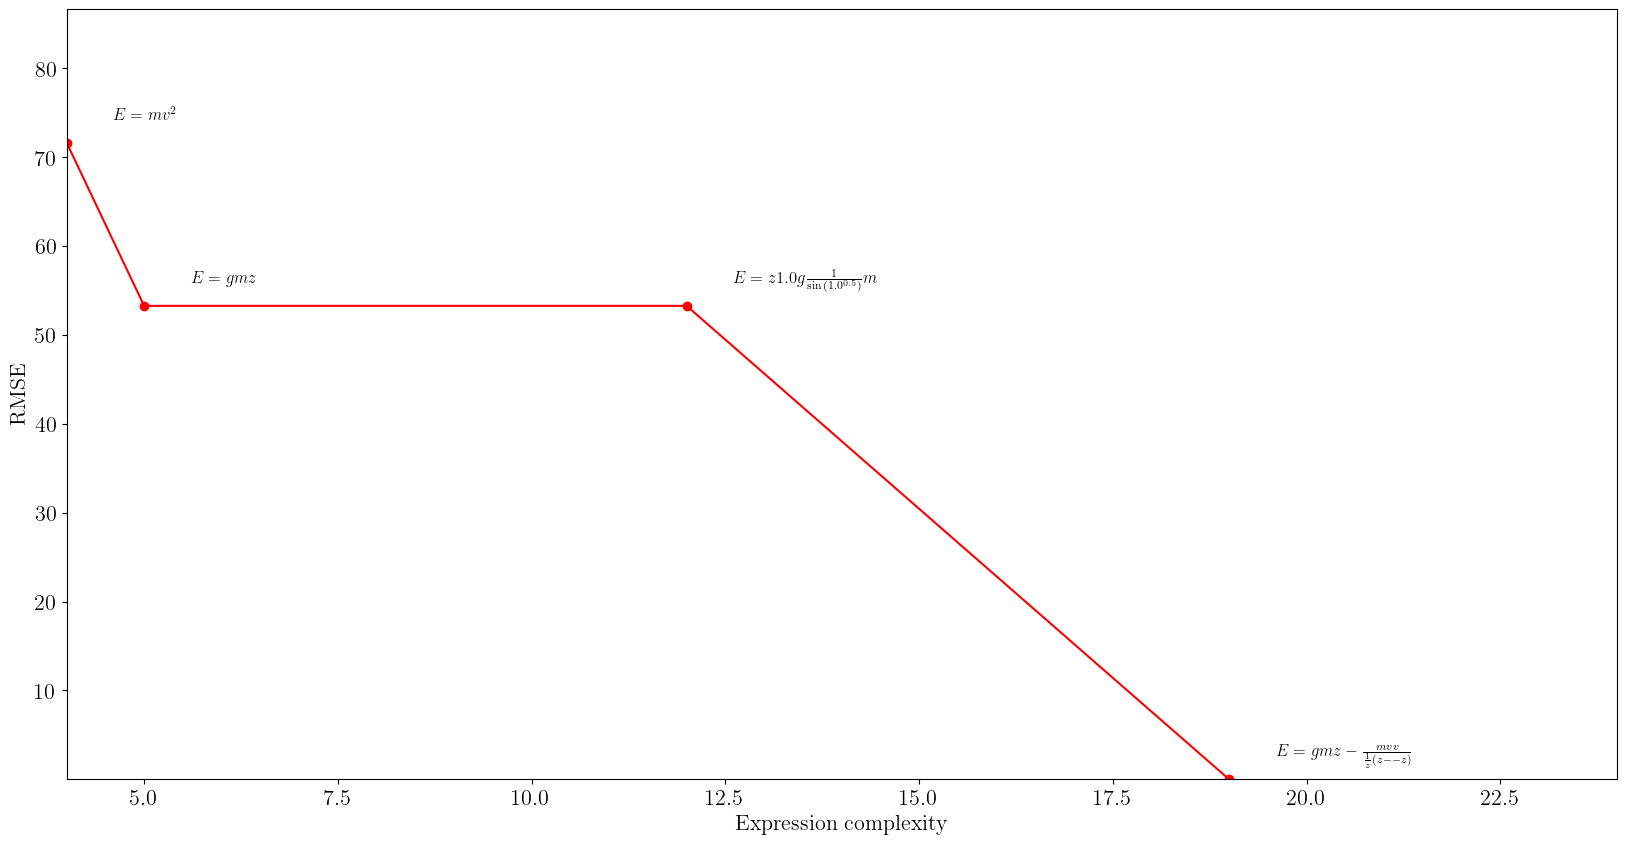

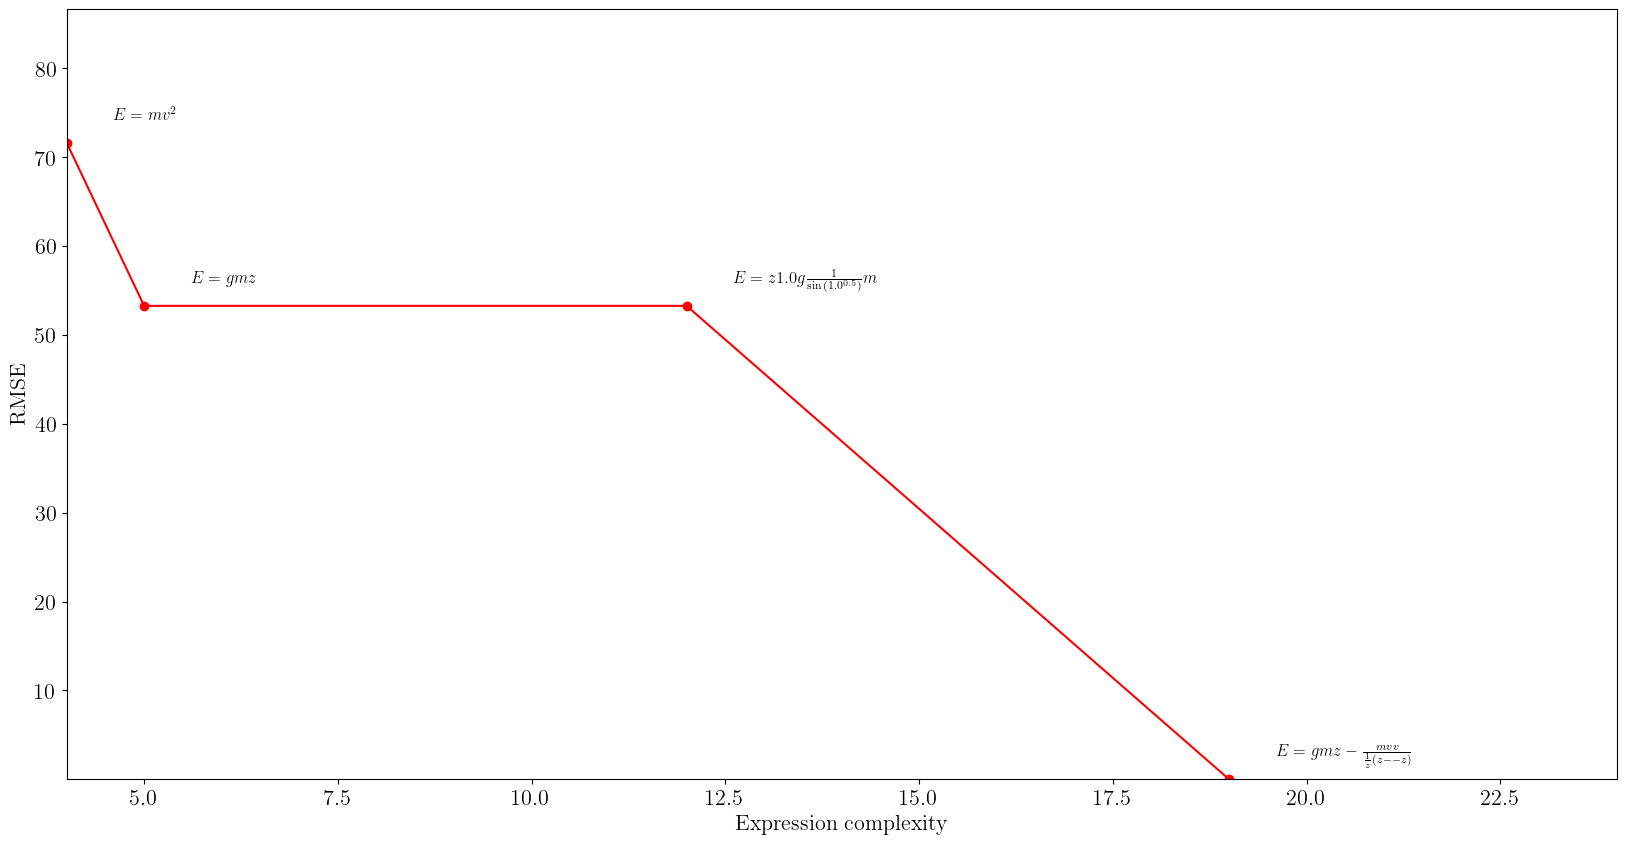

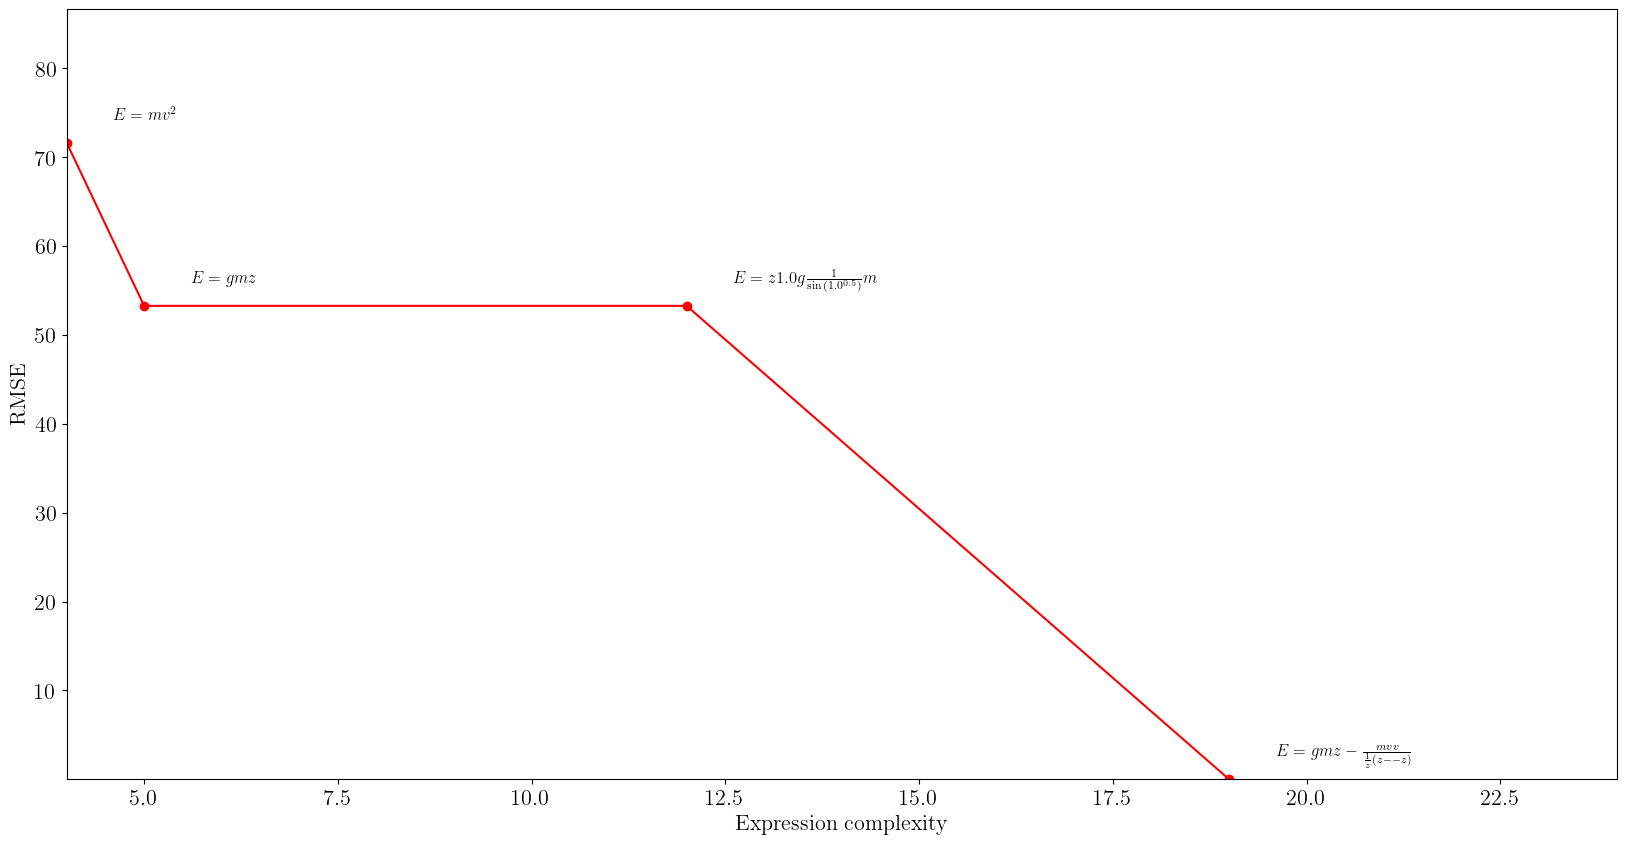

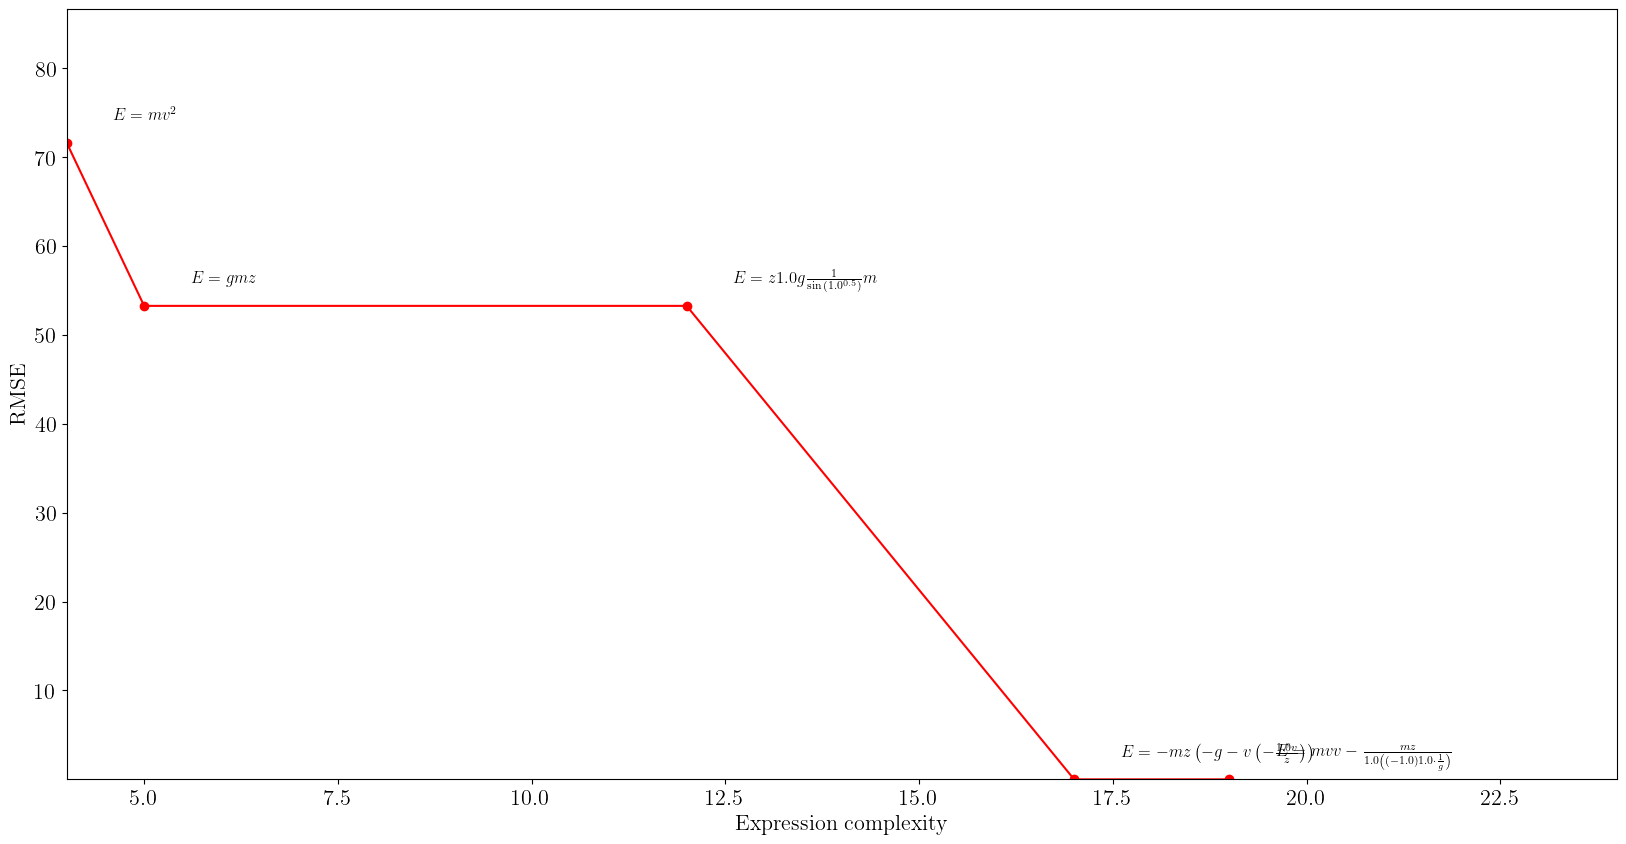

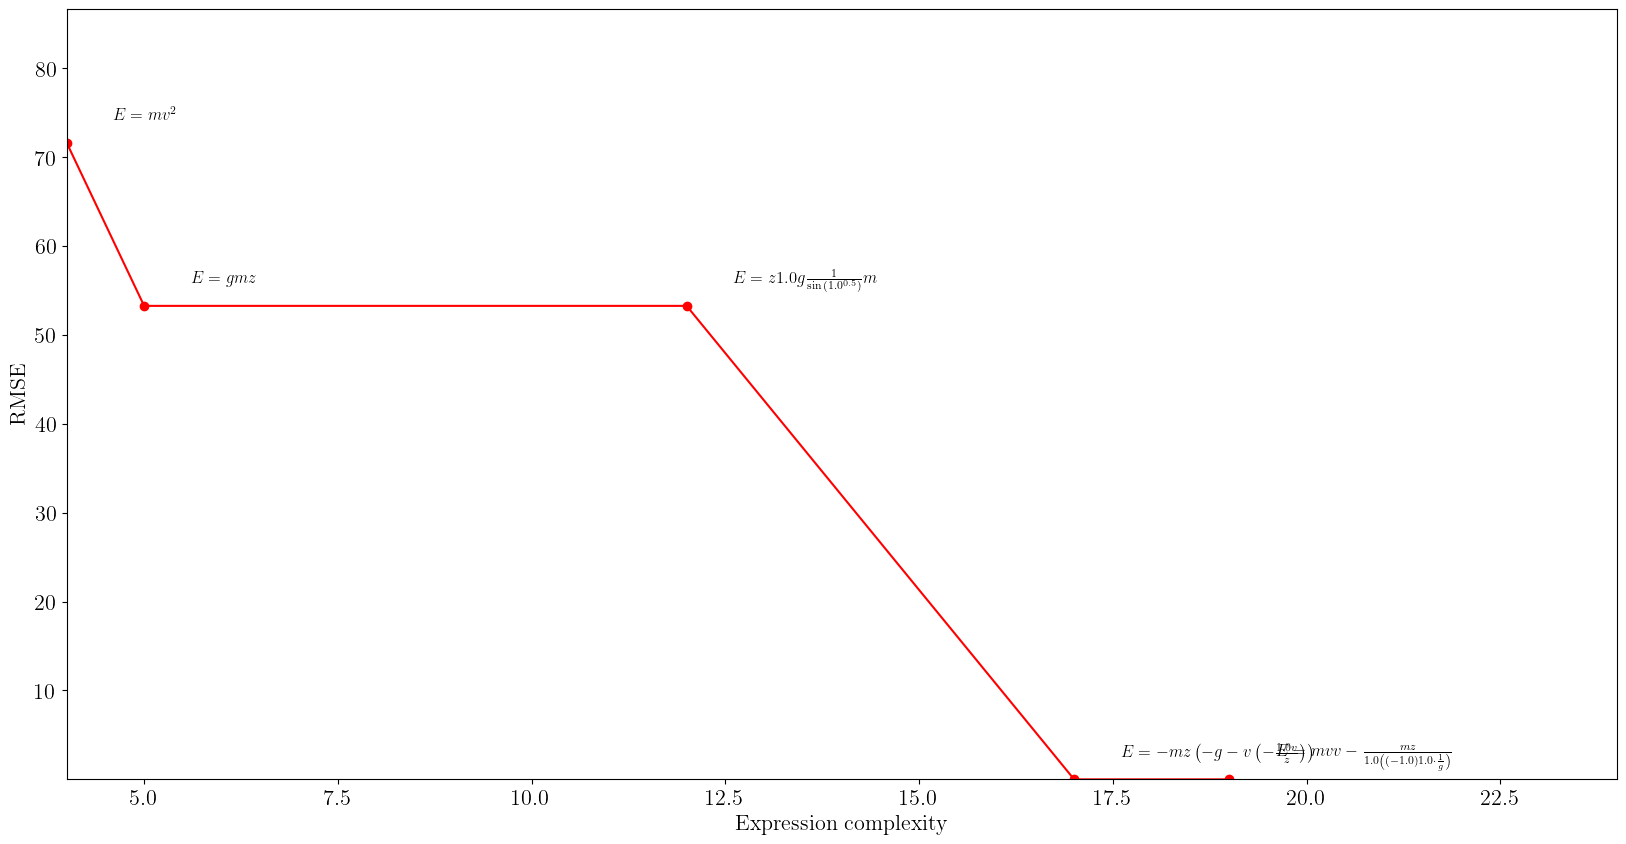

In [3]:
# Running SR task
expression, logs = physo.SR(X, y,
                            # Giving names of variables (for display purposes)
                            X_names = [ "z"       , "v"        ],
                            # Giving units of input variables
                            X_units = [ [1, 0, 0] , [1, -1, 0] ],
                            # Giving name of root variable (for display purposes)
                            y_name  = "E",
                            # Giving units of the root variable
                            y_units = [2, -2, 1],
                            # Fixed constants
                            fixed_consts       = [ 1.      ],
                            # Units of fixed constants
                            fixed_consts_units = [ [0,0,0] ],
                            # Free constants names (for display purposes)
                            free_consts_names = [ "m"       , "g"        ],
                            # Units offFree constants
                            free_consts_units = [ [0, 0, 1] , [1, -2, 0] ],
)

### Inspecting the best expression found

In [7]:
# Inspecting the best expression found
# In ascii
print("\nIn ascii:")
print(expression.get_infix_pretty(do_simplify=True))
# In latex
print("\nIn latex")
print(expression.get_infix_latex(do_simplify=True))
# Free constants values
print("\nFree constants values")
print(expression.free_const_values.cpu().detach().numpy())


In ascii:
  ⎛       2⎞
m⋅⎝g⋅z + v ⎠

In latex
m \left(g z + v^{2}\right)

Free constants values
[9.8069999  1.23400001]


### Inspecting pareto front expressions

In [8]:

# Inspecting pareto front expressions
pareto_front_complexities, pareto_front_expressions, pareto_front_r, pareto_front_rmse = logs.get_pareto_front()
for i, prog in enumerate(pareto_front_expressions):
    # Showing expression
    print(prog.get_infix_pretty(do_simplify=True))
    # Showing free constant
    free_consts = prog.free_const_values.detach().cpu().numpy()
    for j in range (len(free_consts)):
        print("%s = %f"%(prog.library.free_const_names[j], free_consts[j]))
    # Showing RMSE
    print("RMSE = {:e}".format(pareto_front_rmse[i]))
    print("-------------\n")

   2
m⋅v 
g = 1.000000
m = 0.930043
RMSE = 7.163190e+01
-------------

g⋅m⋅z
g = 3.233133
m = 3.233133
RMSE = 5.327238e+01
-------------

g⋅m⋅z 
──────
sin(1)
g = 2.965809
m = 2.965809
RMSE = 5.327238e+01
-------------

  ⎛       2⎞
m⋅⎝g⋅z - v ⎠
g = -9.807001
m = -1.234000
RMSE = 6.142559e-06
-------------

  ⎛       2⎞
m⋅⎝g⋅z + v ⎠
g = 9.807000
m = 1.234000
RMSE = 5.487717e-07
-------------

